TASK 3: Customer Segmentation Analysis with Python
AUTHOR: ANTOJOVI J
PROBLEM STATEMENT
    You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.
Import required libraries

In [ ]:
# Data Preprocessing

# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

import dataset

In [ ]:
df = pd.read_csv(r"/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

DATA VISUALIZATION
UNIVARIATE ANALYSIS

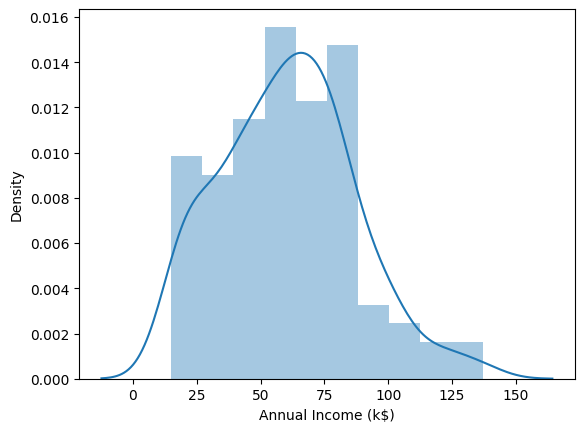

In [ ]:
sns.distplot(df['Annual Income (k$)']);

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

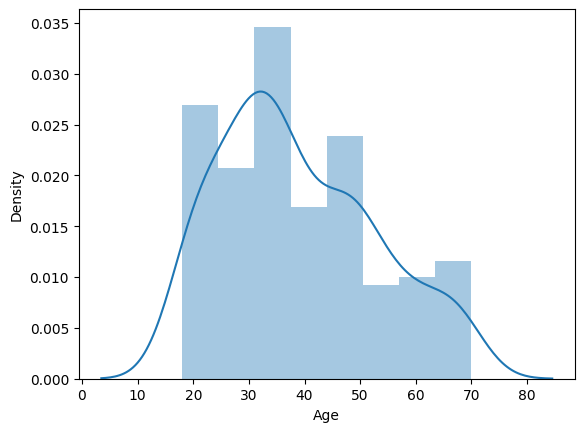

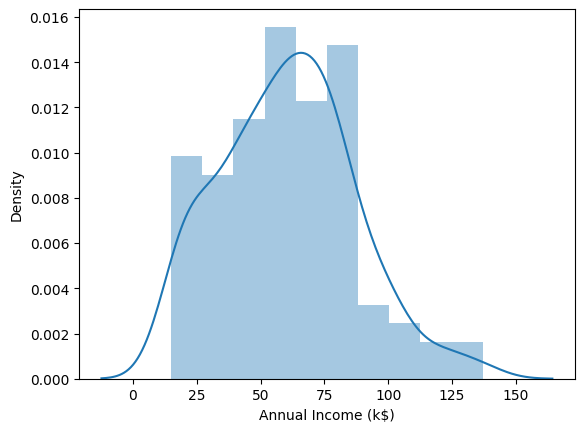

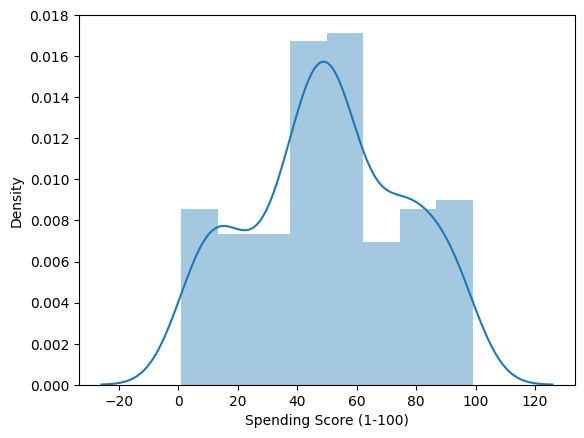

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

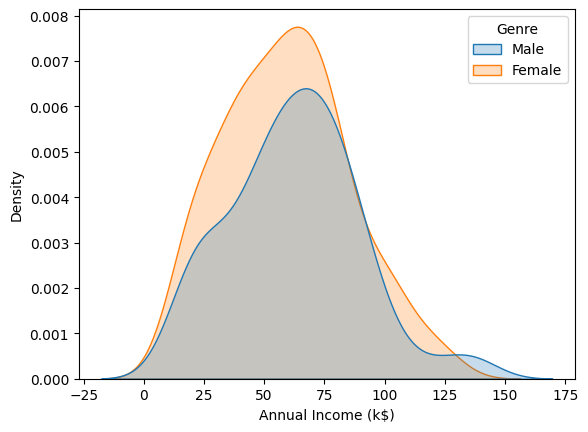

In [ ]:
# Use the `hue` parameter to create separate KDE plots for each genre category
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Genre')

<Figure size 640x480 with 0 Axes>

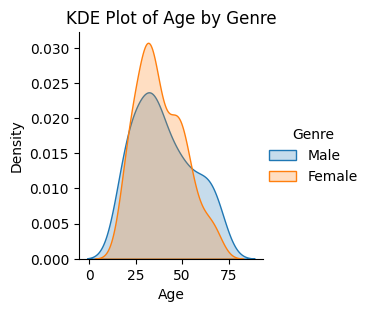

<Figure size 640x480 with 0 Axes>

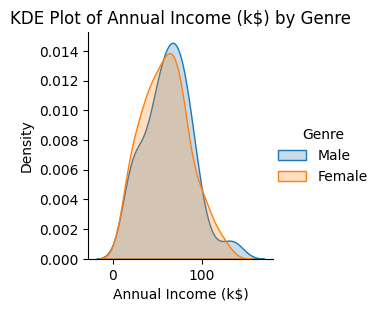

<Figure size 640x480 with 0 Axes>

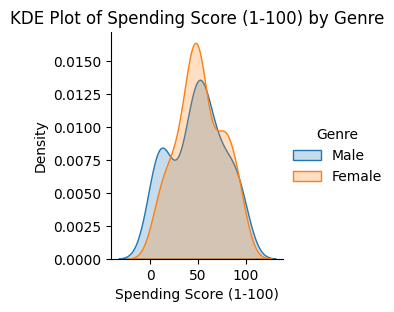

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    g = sns.FacetGrid(df, hue='Genre', height=3)
    g.map(sns.kdeplot, i, shade=True)
    g.add_legend()
    plt.title(f"KDE Plot of {i} by Genre")
    plt.show()

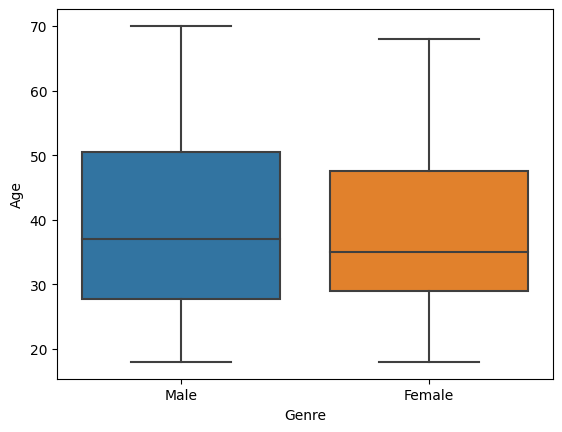

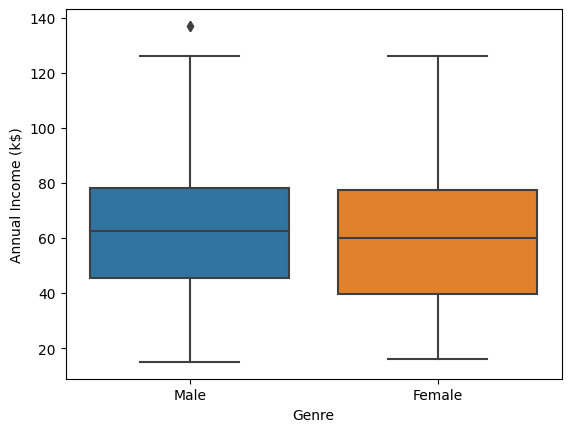

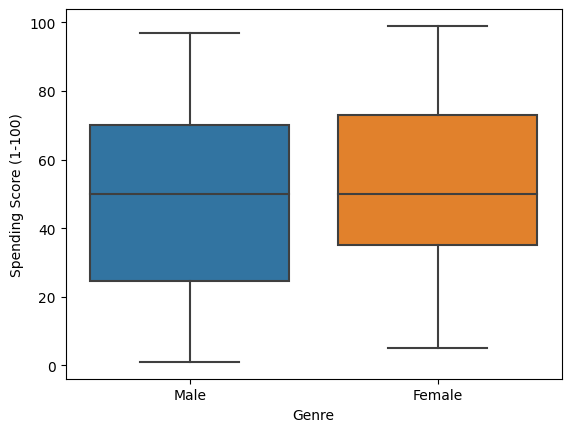

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Genre',y=df[i])


In [ ]:
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

BIVARIATE ANALYSIS

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

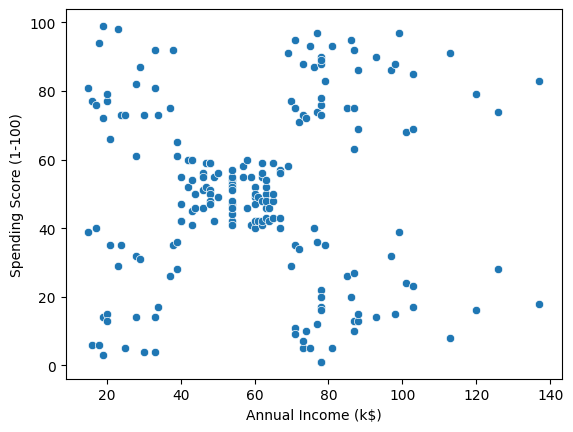

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

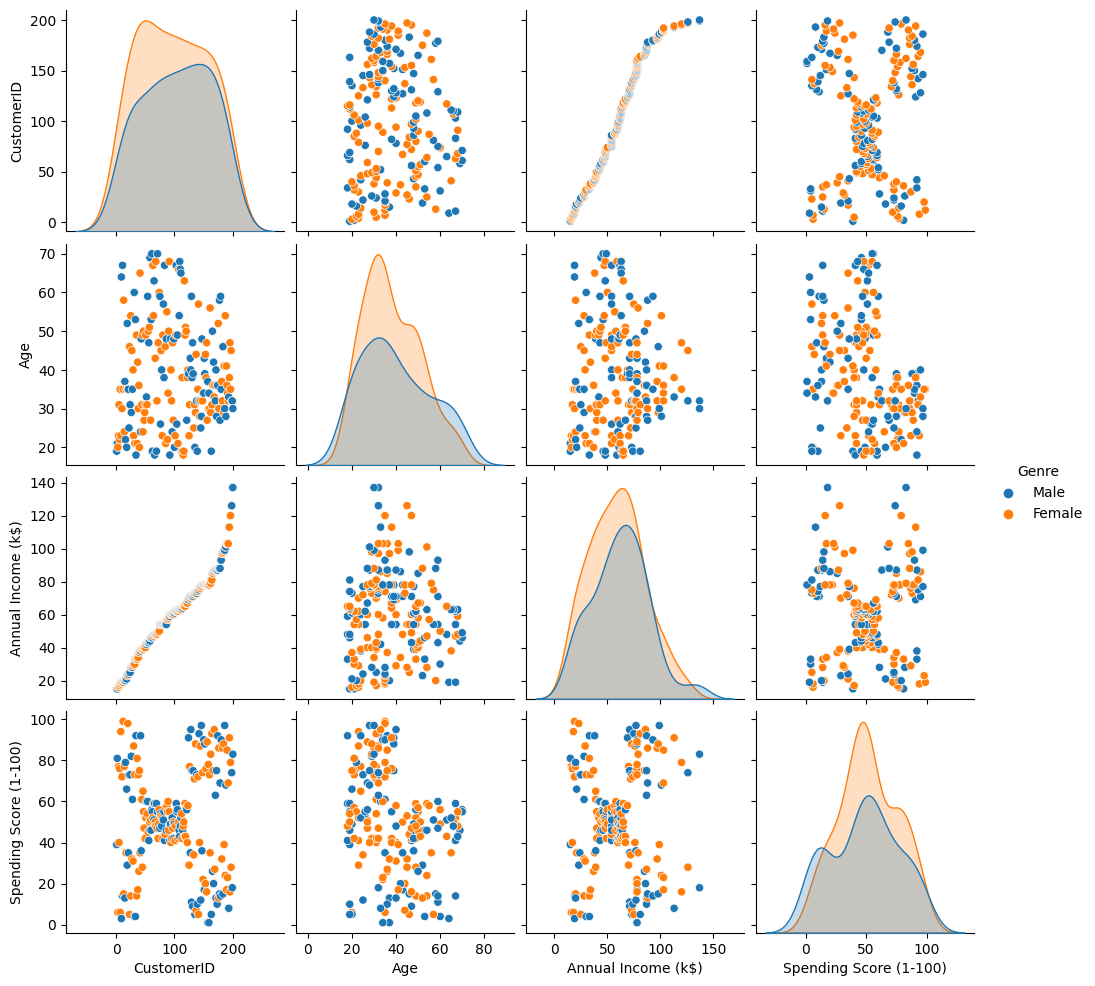

In [ ]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Genre')

In [ ]:
df.groupby(['Genre'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

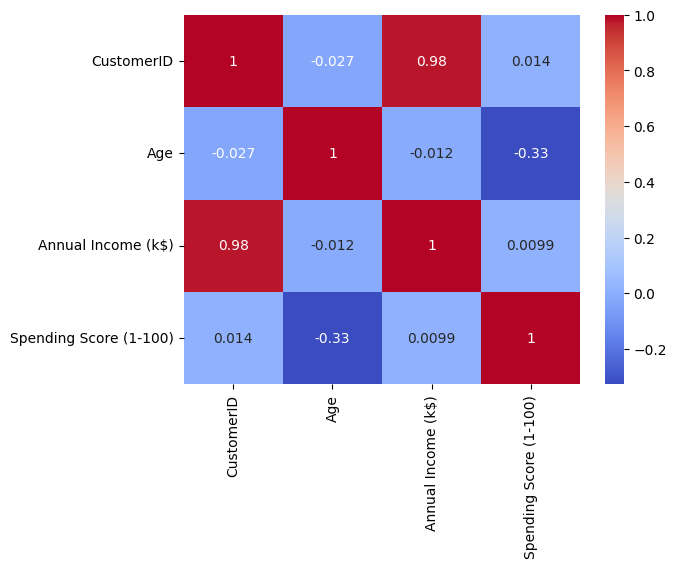

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Clustering - Univariate, Bivariate, Multivariate

In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [ ]:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [ ]:
clustering1.inertia_

23517.33093093093

In [ ]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [ ]:
intertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3936.796825396824,
 2862.8330280830296,
 2253.3013114336645,
 1746.4707792207803]

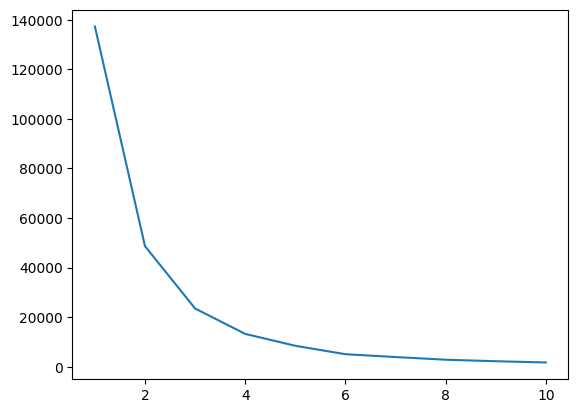

In [ ]:
plt.plot(range(1,11),intertia_scores)

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [ ]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


Bivariate Clustering

In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3


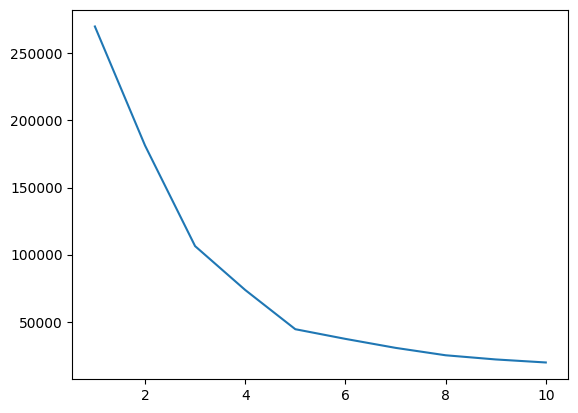

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

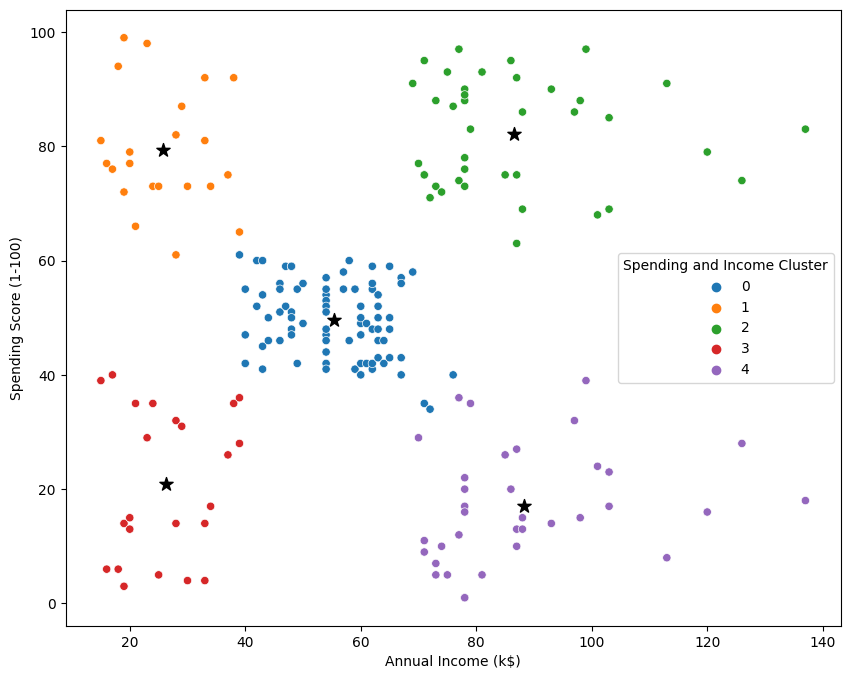

In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Genre'],normalize='index')

Genre,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


In [ ]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


mulivariate clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3


In [ ]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Genre_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,1,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,1,0
4,5,31,17,40,1,3,0


In [ ]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Genre_Male'],
      dtype='object')

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Genre_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


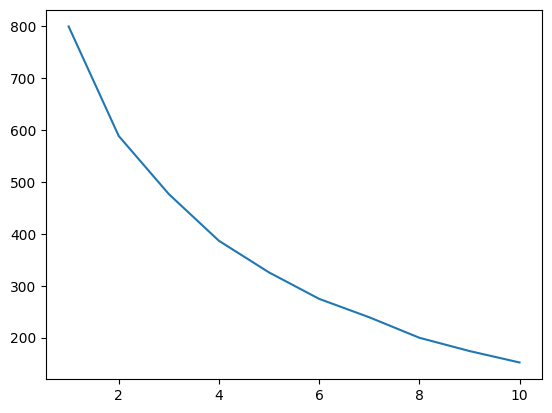

In [ ]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,4
